In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_name_1 = 'Data | C.1.csv'
df = pd.read_csv(file_name_1,skiprows=[0],header=0)

In [3]:
df.head()

,Keyword,Currency,Segmentation,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),...,Searches: Jul 2023,Searches: Aug 2023,Searches: Sep 2023,Searches: Oct 2023,Searches: Nov 2023,Searches: Dec 2023,Searches: Jan 2024,Searches: Feb 2024,Searches: Mar 2024,Searches: Apr 2024
0,NaN,NaN,All,231880.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Australia,231880.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,beach cover ups,AUD,NaN,6600.0,-19%,0%,High,98.0,0.35,1.69,...,6600.0,6600.0,8100.0,8100.0,8100.0,9900.0,9900.0,5400.0,5400.0,4400.0
3,black cocktail dresses,AUD,NaN,6600.0,0%,0%,High,100.0,0.41,1.39,...,6600.0,8100.0,8100.0,9900.0,8100.0,3600.0,5400.0,5400.0,6600.0,5400.0
4,black designer dresses,AUD,NaN,260.0,-19%,-19%,High,97.0,0.60,1.83,...,320.0,210.0,260.0,480.0,210.0,140.0,260.0,320.0,260.0,260.0


In [4]:
# Extracting All and Australia values
All = df.iloc[0, 3]
Australia = df.iloc[1, 3]
df = df.drop([0, 1]).reset_index(drop=True)
df.head()

,Keyword,Currency,Segmentation,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),...,Searches: Jul 2023,Searches: Aug 2023,Searches: Sep 2023,Searches: Oct 2023,Searches: Nov 2023,Searches: Dec 2023,Searches: Jan 2024,Searches: Feb 2024,Searches: Mar 2024,Searches: Apr 2024
0,beach cover ups,AUD,NaN,6600.0,-19%,0%,High,98.0,0.35,1.69,...,6600.0,6600.0,8100.0,8100.0,8100.0,9900.0,9900.0,5400.0,5400.0,4400.0
1,black cocktail dresses,AUD,NaN,6600.0,0%,0%,High,100.0,0.41,1.39,...,6600.0,8100.0,8100.0,9900.0,8100.0,3600.0,5400.0,5400.0,6600.0,5400.0
2,black designer dresses,AUD,NaN,260.0,-19%,-19%,High,97.0,0.60,1.83,...,320.0,210.0,260.0,480.0,210.0,140.0,260.0,320.0,260.0,260.0
3,cocktail & formal styles,AUD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cocktail dresses,AUD,NaN,74000.0,0%,22%,High,100.0,0.39,1.36,...,74000.0,90500.0,90500.0,110000.0,110000.0,49500.0,74000.0,74000.0,74000.0,74000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Keyword                       67 non-null     object 
 1   Currency                      67 non-null     object 
 2   Segmentation                  0 non-null      object 
 3   Avg. monthly searches         59 non-null     float64
 4   Three month change            59 non-null     object 
 5   YoY change                    59 non-null     object 
 6   Competition                   58 non-null     object 
 7   Competition (indexed value)   58 non-null     float64
 8   Top of page bid (low range)   50 non-null     float64
 9   Top of page bid (high range)  50 non-null     float64
 10  Ad impression share           0 non-null      float64
 11  Organic average position      0 non-null      float64
 12  Organic impression share      0 non-null      float64
 13  In Acco

In [6]:
#Since there are few columns which doesn't contain data at all, it is better to remove them
df = df.dropna(axis=1, how='all')

#Since only Search volume data is utilised in this task, we are dropping all the rows where any of the 
#monthly Search column is null
search_columns = [col for col in df.columns if col.startswith("Searches:")]
df.dropna(subset=search_columns, how='all', inplace=True)
df.reset_index(drop=True, inplace=True)

'''
For handling missing values of other columns, we can use following approaches.
For Top of page bid (low range) and Top of page bid (high range), depending on the field characteristic and 
the nature of anlysis, missing values for these numeric features can be filled with either mean, median or mode:
Although for this dataset, since each row represents a different keyword hence a different product, the search
volume for them can vary drastically, hence filling it with any central tendency is not recommended:
'''
#df['Top of page bid (low range)'] = df['Top of page bid (low range)'].fillna(df['Top of page bid (low range)'].mean())
#df['Top of page bid (high range)'] = df['Top of page bid (high range)'].fillna(df['Top of page bid (high range)'].mean())
'''
To fill missing values in Categorical field like Competition, majority or mode can be chosen, again depending on
the characteristics of field and analysis:
'''

#most_common_competition = df['Competition'].mode().iloc[0]
#df['Competition'] = df['Competition'].fillna(most_common_competition)
'''
Since Competition (indexed value) directly corresponds to Competition, we can create a mapping between them and use
some central tendency like median to fill the corresponding mising values:
'''
#competition_index_map = df.groupby('Competition')['Competition (indexed value)'].median().to_dict()

#def fill_competition_index(row):
#    if pd.isna(row['Competition (indexed value)']) and not pd.isna(row['Competition']):
#        return competition_index_map.get(row['Competition'], df['Competition (indexed value)'].median())
#    return row['Competition (indexed value)']

#df['Competition (indexed value)'] = df.apply(fill_competition_index, axis=1)


'\nSince Competition (indexed value) directly corresponds to Competition, we can create a mapping between them and use\nsome central tendency like median to fill the corresponding mising values:\n'

In [7]:
#Handling Three month change and YoY change by removing '%' and converting it to float
#Since there are many fields having '∞' symbol, it's worth to create a custom function for these conversions while 
#retaining infinity value which might be useful (can infer from domain knowledge)

def convert_to_float(value):
    if value == '∞':
        return np.inf
    elif value == '-∞':
        return -np.inf
    else:
        try:
            return float(value) / 100.0
        except ValueError:
            return np.nan

df['Three month change'] = df['Three month change'].str.rstrip('%')
df['YoY change'] = df['YoY change'].str.rstrip('%')

df['Three month change'] = df['Three month change'].apply(convert_to_float)
df['YoY change'] = df['YoY change'].apply(convert_to_float)

In [8]:
#For Keyword cleaning, there could be a lot NLP steps involved to handle many cases, like special characters in
#the keywords, standardizing variations (e.g. colour and color), and various other scenarios.

#For simplicity, doing just basic cleaning, i.e. converting it to lowercase for consistency and removing whitespace
df['Keyword'] = df['Keyword'].str.strip().str.lower()

In [9]:
#converting the column names to a standard format, lowercase, and removing special characters
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '').str.replace('(', '').str.replace(')', '').str.replace(':', '')

## The following chart shows average monthly searches over the given months for the company. 
#### Although the data is in product/keyword level granularity, this chart helps to understand the overall search trend for the company.

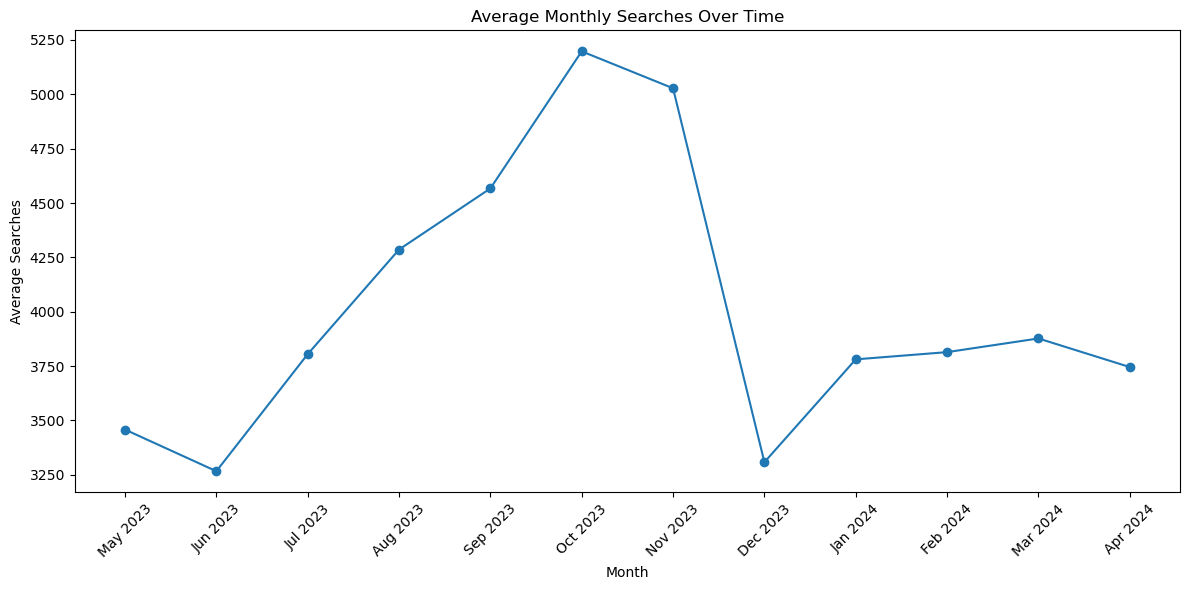

In [10]:
search_columns = [col for col in df.columns if col.startswith('searches_')]
df_searches = df[search_columns]
df_searches_mean = df_searches.mean()

new_labels = [col.split('_', 1)[1].capitalize().replace('_', ' ') for col in df_searches_mean.index]

plt.figure(figsize=(12, 6))
plt.plot(new_labels, df_searches_mean.values, marker='o')
plt.title('Average Monthly Searches Over Time')
plt.xlabel('Month')
plt.ylabel('Average Searches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monthly search volume for each keyword

In [11]:
monthly_data = df[['keyword'] + search_columns]
monthly_data.columns = ['keyword'] + new_labels

In [12]:
monthly_data.head(len(monthly_data))

,keyword,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023,Dec 2023,Jan 2024,Feb 2024,Mar 2024,Apr 2024
0,beach cover ups,4400.0,5400.0,6600.0,6600.0,8100.0,8100.0,8100.0,9900.0,9900.0,5400.0,5400.0,4400.0
1,black cocktail dresses,5400.0,5400.0,6600.0,8100.0,8100.0,9900.0,8100.0,3600.0,5400.0,5400.0,6600.0,5400.0
2,black designer dresses,320.0,260.0,320.0,210.0,260.0,480.0,210.0,140.0,260.0,320.0,260.0,260.0
3,cocktail dresses,60500.0,60500.0,74000.0,90500.0,90500.0,110000.0,110000.0,49500.0,74000.0,74000.0,74000.0,74000.0
4,cotton midi dress,320.0,480.0,590.0,880.0,1300.0,1300.0,1300.0,1600.0,1000.0,1000.0,880.0,590.0
5,day dresses,1600.0,1600.0,1900.0,2900.0,3600.0,4400.0,4400.0,3600.0,2900.0,2900.0,2900.0,1900.0
6,denim dresses,22200.0,22200.0,33100.0,40500.0,49500.0,49500.0,49500.0,40500.0,40500.0,49500.0,49500.0,40500.0
7,designer beach dresses,30.0,50.0,40.0,40.0,70.0,50.0,70.0,140.0,50.0,40.0,40.0,40.0
8,designer casual dresses for daywear,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,10.0,10.0,10.0,10.0
9,designer cocktail dresses,590.0,720.0,590.0,590.0,880.0,720.0,720.0,390.0,590.0,720.0,480.0,390.0


### Month over Month biggest risers and fallers

In [13]:
#Working:
#Initially decided to show the biggest risers and fallers in terms of both Absolute and PCT change.
#Then faced the problem of inf value when previous month's search volume was 0, and tried handling it. 
#Finally realized that PCT change doesn't add much value compared to Absolute change, 
#for e.g. increase in search volume from 10 to 50 in PCT would be 400%, while 10k to 12k would be 20%, 
#but obviously the latter adds more value. 
#Following is the code with previous approach:

'''def mom_changes(df):
    search_columns = [col for col in df.columns if col.startswith('searches_')]
    monthly_data = df[['keyword'] + search_columns]
    
    for i in range(1, len(search_columns)):
        abs_change_col = f'mom_abs_change_{search_columns[i]}'
        pct_change_col = f'mom_pct_change_{search_columns[i]}'
        
        monthly_data[abs_change_col] = monthly_data[search_columns[i]] - monthly_data[search_columns[i-1]]
        monthly_data[pct_change_col] = (monthly_data[search_columns[i]] - monthly_data[search_columns[i-1]]) / monthly_data[search_columns[i-1]]
    
    abs_change_columns = [col for col in monthly_data.columns if col.startswith('mom_abs_change_')]
    
    for abs_col in abs_change_columns:
        month = abs_col.replace('mom_abs_change_searches_', '').replace('_', ' ').title()
        pct_col = abs_col.replace('abs', 'pct')
        
        # Absolute changes
        abs_riser = monthly_data.loc[monthly_data[abs_col].idxmax()]
        abs_faller = monthly_data.loc[monthly_data[abs_col].idxmin()]
        
        # Percentage changes
        pct_riser = monthly_data.loc[monthly_data[pct_col].idxmax()]
        pct_faller = monthly_data.loc[monthly_data[pct_col].idxmin()]
        
        print(f"\nFor {month}:")
        print("Absolute Changes:")
        print(f"Biggest Riser: {abs_riser['keyword']}: +{abs_riser[abs_col]:,.0f}")
        print(f"Biggest Faller: {abs_faller['keyword']}: {abs_faller[abs_col]:,.0f}")
        
        print("\nPercentage Changes:")
        print(f"Biggest Riser: {pct_riser['keyword']}: {pct_riser[pct_col]:+.2%}")
        print(f"Biggest Faller: {pct_faller['keyword']}: {pct_faller[pct_col]:.2%}")
        print("-"*60)
'''

def mom_changes(df):
    search_columns = [col for col in df.columns if col.startswith('searches_')]
    monthly_data = df[['keyword'] + search_columns]
    
    for i in range(1, len(search_columns)):
        change_col = f'mom_change_{search_columns[i]}'
        monthly_data[change_col] = monthly_data[search_columns[i]] - monthly_data[search_columns[i-1]]
    
    change_columns = [col for col in monthly_data.columns if col.startswith('mom_change_')]
    
    for col in change_columns:
        month = col.replace('mom_change_searches_', '').replace('_', ' ').title()
        biggest_riser = monthly_data.loc[monthly_data[col].idxmax()]
        biggest_faller = monthly_data.loc[monthly_data[col].idxmin()]
        
        print(f"\nFor {month}:")
        print(f"Biggest Riser: {biggest_riser['keyword']}: +{biggest_riser[col]:,.0f}")
        print(f"Biggest Faller: {biggest_faller['keyword']}: {biggest_faller[col]:,.0f}")
        print("-"*50)
        
mom_changes(df)


For Jun 2023:
Biggest Riser: beach cover ups: +1,000
Biggest Faller: long sleeve midi dress: -4,900
--------------------------------------------------

For Jul 2023:
Biggest Riser: cocktail dresses: +13,500
Biggest Faller: long sleeve knitted dress: -4,900
--------------------------------------------------

For Aug 2023:
Biggest Riser: cocktail dresses: +16,500
Biggest Faller: long sleeve knitted dress: -4,500
--------------------------------------------------

For Sep 2023:
Biggest Riser: denim dresses: +9,000
Biggest Faller: long sleeve knitted dress: -3,000
--------------------------------------------------

For Oct 2023:
Biggest Riser: cocktail dresses: +19,500
Biggest Faller: short sleeve knitted dress: -200
--------------------------------------------------

For Nov 2023:
Biggest Riser: party dresses: +6,000
Biggest Faller: evening dresses: -9,000
--------------------------------------------------

For Dec 2023:
Biggest Riser: beach cover ups: +1,800
Biggest Faller: cocktail dre

In [14]:
def show_mom_changes(df, top_n=5):
    search_columns = [col for col in df.columns if col.startswith('searches_')]
    monthly_data = df[['keyword'] + search_columns]
    
    # Calculate month-over-month changes
    for i in range(1, len(search_columns)):
        change_col = f'mom_change_{search_columns[i]}'
        monthly_data[change_col] = (monthly_data[search_columns[i]] - monthly_data[search_columns[i-1]]) / monthly_data[search_columns[i-1]]
    
    # Get the change columns
    change_columns = [col for col in monthly_data.columns if col.startswith('mom_change_')]
    
    # Function to get top risers and fallers for a specific month
    def get_top_changes(month_col):
        month = month_col.replace('mom_change_searches_', '').replace('_', ' ')
        top_risers = monthly_data.nlargest(top_n, month_col)[['keyword', month_col]]
        top_fallers = monthly_data.nsmallest(top_n, month_col)[['keyword', month_col]]
        
        print(f"\nTop {top_n} Risers for {month}:")
        for _, row in top_risers.iterrows():
            print(f"{row['keyword']}: {row[month_col]:.2%}")
        
        print(f"\nTop {top_n} Fallers for {month}:")
        for _, row in top_fallers.iterrows():
            print(f"{row['keyword']}: {row[month_col]:.2%}")
    
    # Show changes for each month
    for col in change_columns:
        get_top_changes(col)
        
show_mom_changes(df)


Top 5 Risers for jun 2023:
designer beach dresses: 66.67%
designer resort wear: 55.56%
resort wear dresses: 52.94%
cotton midi dress: 50.00%
designer linen dress: 40.00%

Top 5 Fallers for jun 2023:
designer short sleeve dress: -100.00%
designer cotton dress: -66.67%
wool midi dress: -57.14%
designer wool dress: -50.00%
designer long sleeve dress: -33.33%

Top 5 Risers for jul 2023:
designer short sleeve dress: inf%
full length dress: 85.71%
designer silk dress: 57.14%
summer party dresses: 52.94%
designer midi dresses: 50.00%

Top 5 Fallers for jul 2023:
designer floor length dresses: -100.00%
designer wool dress: -100.00%
maxi wool dress: -50.00%
designer resort wear: -35.71%
wool knitted dress: -33.90%

Top 5 Risers for aug 2023:
designer floor length dresses: inf%
designer wool dress: inf%
designer cotton dress: 100.00%
maxi sleeveless dress: 85.71%
mid length dresses: 84.38%

Top 5 Fallers for aug 2023:
maxi wool dress: -57.14%
knit dresses: -56.82%
wool knitted dress: -56.41%
de

### Closely spending

In [23]:
file_name_2 = 'Data | C.2.csv'
df2 = pd.read_csv(file_name_2,header=0)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    1206 non-null   object
 1   Spend    1206 non-null   object
 2   Keyword  1206 non-null   object
dtypes: object(3)
memory usage: 28.4+ KB


In [25]:
df2['Month'] = pd.to_datetime(df2['Month'], format='%d/%m/%Y')

In [26]:
df2['Keyword'] = df2['Keyword'].str.strip().str.lower()
df2 = df2.rename(columns={'Keyword': 'keyword'})

In [27]:
df2['Spend'] = df2['Spend'].str.replace('$', '').str.replace(',', '').astype(float)

In [28]:
df2[df2.duplicated(subset=['Month', 'keyword'], keep=False)]

,Month,Spend,keyword


In [74]:
df2_pivot = df2_agg.pivot(index='Month', columns='Keyword', values='Spend')
df2_pivot.head()

Keyword,beach cover ups,black cocktail dresses,black designer dresses,cocktail & formal styles,cocktail dresses,cotton midi dress,day dresses,denim dresses,designer beach dresses,designer casual dresses for daywear,designer cocktail dresses,designer cotton dress,designer dresses,designer eveningwear,designer floor length dresses,designer formal dresses,designer knitted dresses,designer linen dress,designer long sleeve dress,designer midi dresses,designer mini & midi party dress,designer mini dresses,designer print dress,designer resort wear,designer short denim dress,designer short sleeve dress,designer silk dress,designer sleeveless dress,designer summer dresses,designer wool dress,evening dresses,floral & summer maxi dress,floral & summer midi dress,floral & summer mini dress,flowy maxi dresses,flowy midi dresses,flowy short dresses,formal white gowns,full length dress,gowns & ball dresses,implement canonical,knit dresses,linen midi dress,long sleeve knitted dress,long sleeve midi dress,maxi cotton dress,maxi linen dress,maxi long sleeve dress,maxi short sleeve dress,maxi silk dress,maxi sleeveless dress,maxi wool dress,mid length dresses,party dresses,patterned & floral dresses,resort wear dresses,resort wear evening dresses,short dresses,short sleeve knitted dress,short sleeve midi dress,silk midi dress,sleeveless knitted dress,sleeveless midi dress,summer party dresses,white designer dresses,wool knitted dress,wool midi dress
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apr 2023,61.0,25181.0,4289.0,25899.0,21837.0,25138.0,10910.0,25053.0,13063.0,5910.0,22979.0,25883.0,27989.0,14219.0,27813.0,26012.0,10166.0,29732.0,13908.0,9104.0,8688.0,13196.0,14150.0,21446.0,1188.0,14325.0,21894.0,24871.0,20380.0,27919.0,16507.0,13083.0,13874.0,6568.0,28423.0,27429.0,8500.0,3959.0,10655.0,28141.0,20153.0,4509.0,14061.0,17936.0,8594.0,2640.0,27434.0,26724.0,23295.0,28570.0,10710.0,8878.0,1655.0,16961.0,10236.0,28295.0,14524.0,20199.0,19128.0,21052.0,6018.0,29422.0,3291.0,11073.0,25137.0,23729.0,4636.0
Apr 2024,6198.0,6236.0,29300.0,2683.0,25147.0,24299.0,10282.0,5839.0,1566.0,641.0,14649.0,19654.0,3118.0,24486.0,17814.0,27148.0,21965.0,24636.0,26293.0,26928.0,15127.0,9963.0,26427.0,28220.0,20104.0,18137.0,42.0,2208.0,28866.0,23638.0,14188.0,22240.0,2266.0,19344.0,26527.0,12870.0,4331.0,15128.0,25766.0,26148.0,11620.0,22027.0,27834.0,12855.0,7181.0,11580.0,23178.0,6660.0,21252.0,16926.0,28743.0,20367.0,12007.0,15154.0,29789.0,5587.0,19206.0,9271.0,1702.0,20204.0,11596.0,22942.0,460.0,2044.0,5349.0,21893.0,12271.0
Aug 2023,2103.0,21102.0,26065.0,5338.0,25812.0,20869.0,16192.0,5986.0,11285.0,4831.0,15297.0,18960.0,15536.0,19513.0,23430.0,14540.0,1000.0,12855.0,9635.0,23993.0,10684.0,5633.0,19543.0,6826.0,20198.0,15728.0,25263.0,6694.0,19621.0,27845.0,16744.0,19726.0,26454.0,18867.0,27556.0,10881.0,27643.0,22605.0,25240.0,26696.0,3886.0,27135.0,7070.0,16489.0,23021.0,13398.0,26119.0,18723.0,21349.0,15054.0,69.0,14818.0,2304.0,26865.0,26191.0,9199.0,10726.0,2169.0,274.0,21829.0,8444.0,9126.0,25193.0,7858.0,12645.0,10528.0,16012.0
Dec 2023,1312.0,23610.0,10573.0,876.0,4399.0,2568.0,21125.0,9962.0,5047.0,8934.0,20479.0,11855.0,7137.0,25197.0,22670.0,4729.0,9537.0,4065.0,26557.0,13403.0,20954.0,23664.0,21043.0,21095.0,11898.0,4965.0,6331.0,1389.0,18822.0,1595.0,13917.0,9341.0,29119.0,7492.0,2114.0,15296.0,17721.0,19323.0,21414.0,595.0,26550.0,17812.0,24964.0,20821.0,6991.0,5391.0,13859.0,29715.0,2952.0,6749.0,24762.0,5268.0,17853.0,23944.0,18672.0,18840.0,23177.0,8826.0,4350.0,8364.0,8868.0,2469.0,8101.0,7998.0,27000.0,4227.0,3152.0
Feb 2023,18153.0,23272.0,16479.0,24978.0,22672.0,26524.0,19443.0,10604.0,28196.0,1926.0,16869.0,3207.0,16405.0,18293.0,3115.0,12944.0,19283.0,16008.0,20715.0,28291.0,6543.0,252.0,4968.0,21274.0,11197.0,10367.0,10651.0,5395.0,17271.0,23748.0,2101.0,22490.0,10309.0,29809.0,22516.0,8590.0,21281.0,17623.0,21263.0,28672.0,18023.0,29866.0,29490.0,5887.0,25217.0,5623.0,4133.0,22559.0,24261.0,2554

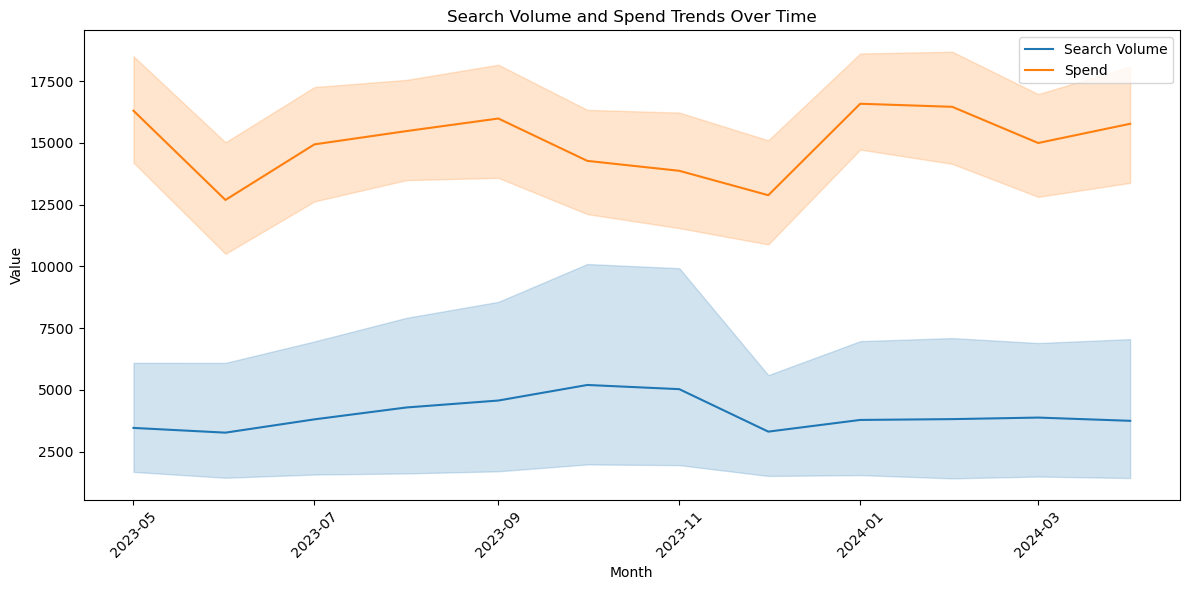

In [29]:
df_melted = df.melt(
    id_vars=['keyword', 'currency'],
    value_vars=['searches_may_2023', 'searches_jun_2023', 'searches_jul_2023', 
                'searches_aug_2023', 'searches_sep_2023', 'searches_oct_2023', 
                'searches_nov_2023', 'searches_dec_2023', 'searches_jan_2024', 
                'searches_feb_2024', 'searches_mar_2024', 'searches_apr_2024'],
    var_name='Month',
    value_name='SearchVolume'
)

# Clean up the 'Month' column
df_melted['Month'] = df_melted['Month'].str.replace('searches_', '').str.capitalize()
df_melted['Month'] = pd.to_datetime(df_melted['Month'], format='%b_%Y')

# Step 2: Merge dataframes
merged_df = pd.merge(df_melted, df2, on=['keyword', 'Month'], how='inner')

# Visualize trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Month', y='SearchVolume', label='Search Volume')
sns.lineplot(data=merged_df, x='Month', y='Spend', label='Spend')
plt.title('Search Volume and Spend Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

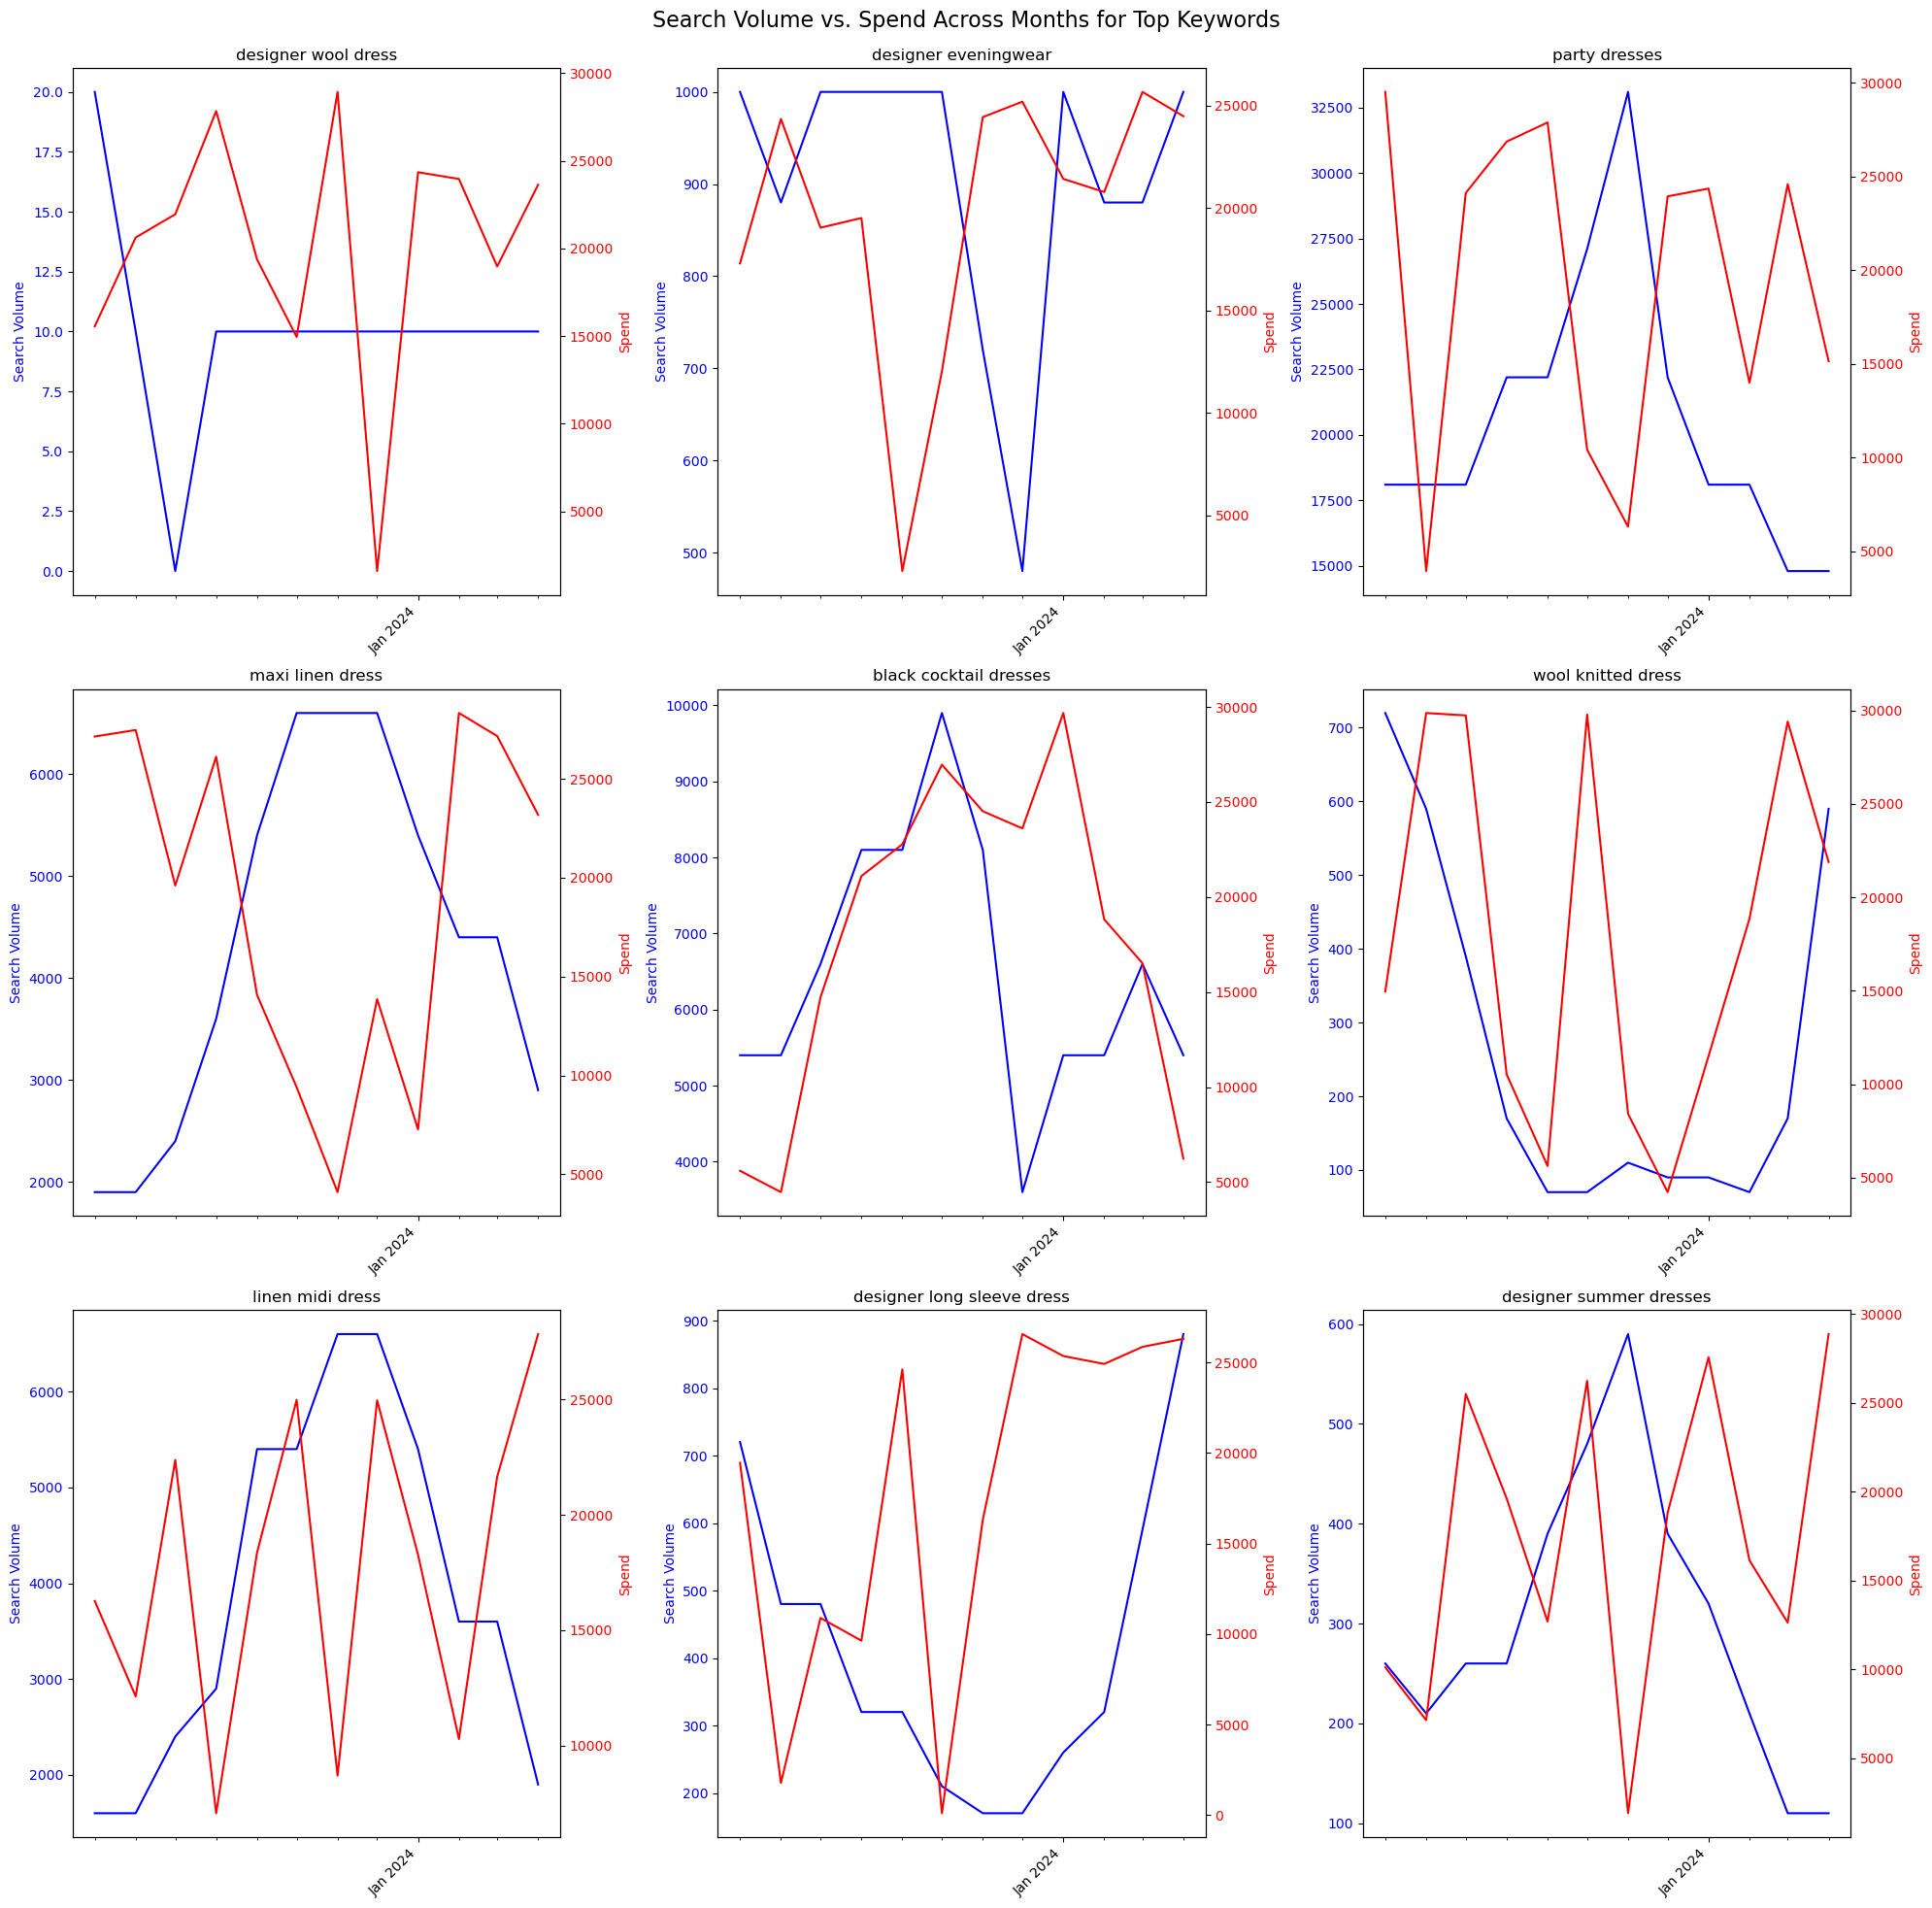

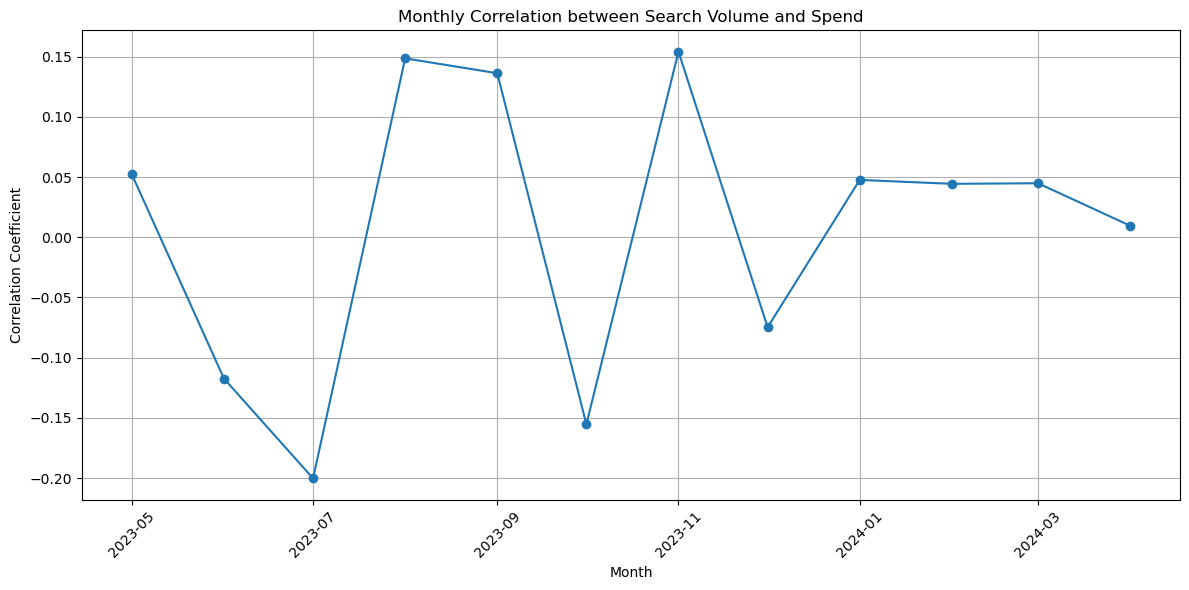

Average monthly correlation between Search Volume and Spend: 0.01


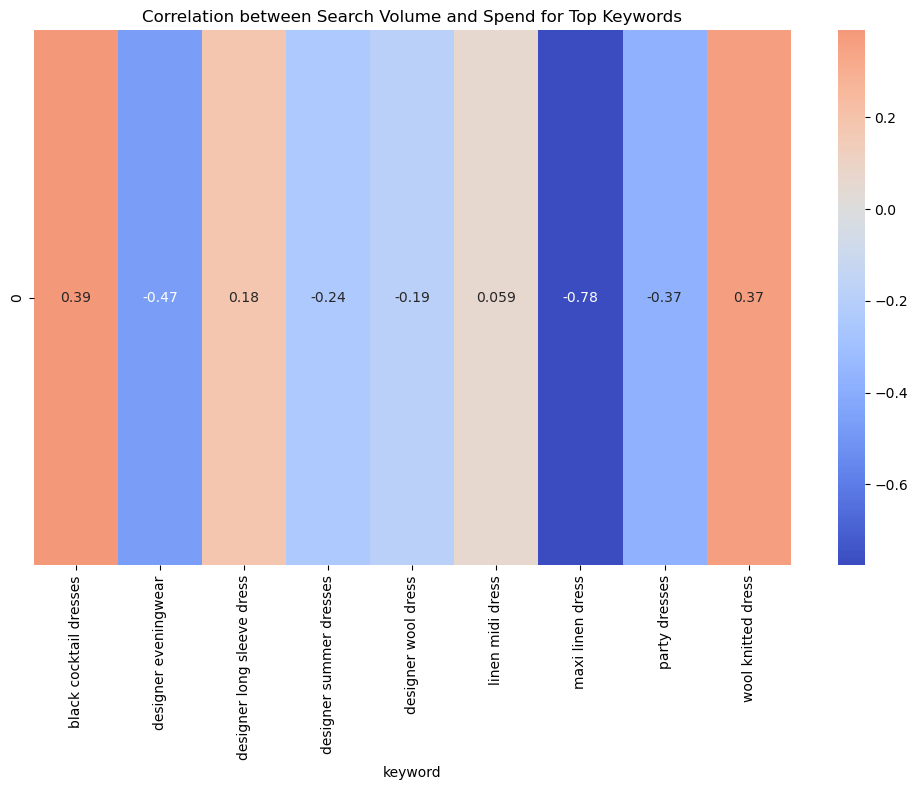

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

# Assuming merged_df is already created from previous steps
# If not, you'll need to merge df and df2 as done in the earlier code

# Convert 'Month' to datetime for proper ordering


# Sort the dataframe by Month
merged_df = merged_df.sort_values('Month')

# Function to plot for a single keyword
def plot_keyword(keyword_df, ax):
    keyword = keyword_df['keyword'].iloc[0]
    
    # Plot search volume
    ax.plot(keyword_df['Month'], keyword_df['SearchVolume'], label='Search Volume', color='blue')
    ax.set_ylabel('Search Volume', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Plot spend on secondary y-axis
    ax2 = ax.twinx()
    ax2.plot(keyword_df['Month'], keyword_df['Spend'], label='Spend', color='red')
    ax2.set_ylabel('Spend', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    ax.set_title(f'{keyword}')
    ax.set_xlabel('')
    
    # Format x-axis labels
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
    ax.xaxis.set_minor_locator(MonthLocator())
    
    # Rotate and align the tick labels so they look better
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Get top N keywords by total spend
top_n = 9  # Adjust this number to show more or fewer keywords
top_keywords = merged_df.groupby('keyword')['Spend'].sum().nlargest(top_n).index

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))  # Adjust the grid size based on top_n
fig.suptitle('Search Volume vs. Spend Across Months for Top Keywords', fontsize=16)

# Plot for each top keyword
for i, keyword in enumerate(top_keywords):
    keyword_df = merged_df[merged_df['keyword'] == keyword]
    ax = axes[i // 3, i % 3]
    plot_keyword(keyword_df, ax)

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust this value to prevent title overlap
plt.show()

# Calculate and plot overall correlation trend
monthly_correlation = merged_df.groupby('Month').apply(lambda x: x['SearchVolume'].corr(x['Spend']))

plt.figure(figsize=(12, 6))
plt.plot(monthly_correlation.index, monthly_correlation.values, marker='o')
plt.title('Monthly Correlation between Search Volume and Spend')
plt.xlabel('Month')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print average correlation
print(f"Average monthly correlation between Search Volume and Spend: {monthly_correlation.mean():.2f}")

# Heatmap of correlations for top keywords
top_keyword_corr = merged_df[merged_df['keyword'].isin(top_keywords)].groupby('keyword').apply(lambda x: x['SearchVolume'].corr(x['Spend']))

plt.figure(figsize=(10, 8))
sns.heatmap(top_keyword_corr.to_frame().T, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Search Volume and Spend for Top Keywords')
plt.tight_layout()
plt.show()

In [23]:
merged_df['Month']

0      May 2023
1      May 2023
2      May 2023
3      May 2023
4      May 2023
         ...   
703    Apr 2024
704    Apr 2024
705    Apr 2024
706    Apr 2024
707    Apr 2024
Name: Month, Length: 708, dtype: object

In [79]:
df2.columns

Index(['Month', 'Spend', 'Keyword'], dtype='object')

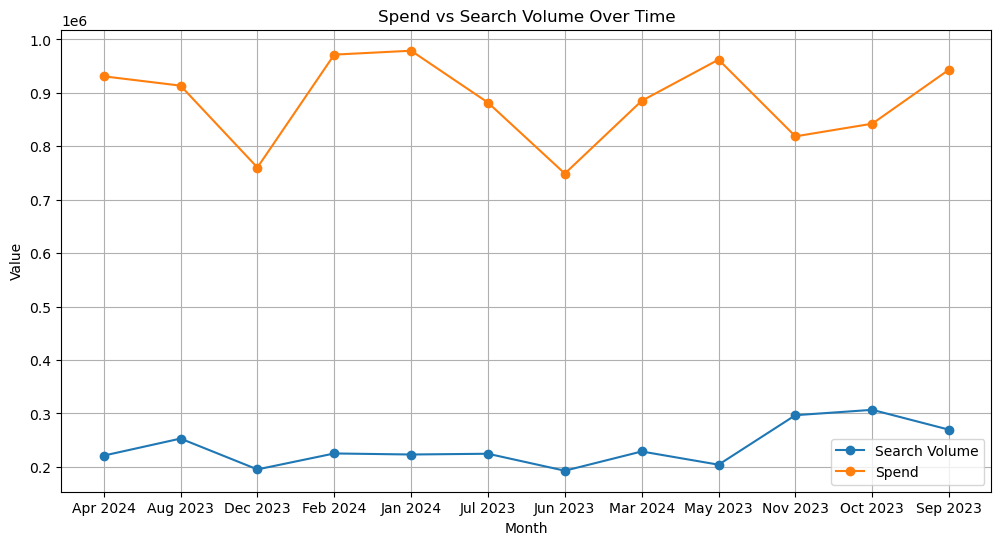

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Melting df to have months and search volumes in separate rows
df_melted = df.melt(
    id_vars=['keyword', 'currency', 'avg_monthly_searches', 'three_month_change', 'yoy_change', 
             'competition', 'competition_indexed_value', 'top_of_page_bid_low_range', 'top_of_page_bid_high_range'],
    value_vars=['searches_may_2023', 'searches_jun_2023', 'searches_jul_2023', 'searches_aug_2023', 
                'searches_sep_2023', 'searches_oct_2023', 'searches_nov_2023', 'searches_dec_2023', 
                'searches_jan_2024', 'searches_feb_2024', 'searches_mar_2024', 'searches_apr_2024'],
    var_name='Month', 
    value_name='Search_Volume'
)

# Converting the month names in df_melted to match the format in df2
df_melted['Month'] = df_melted['Month'].str.replace('searches_', '', regex=False)
df_melted['Month'] = pd.to_datetime(df_melted['Month'], format='%b_%Y').dt.strftime('%b %Y')



# Merging the dataframes on keyword and month
merged_df = pd.merge(df_melted, df2, left_on=['keyword', 'Month'], right_on=['keyword', 'Month'], how='inner')

# Aggregating by month to get total spend and search volume
agg_df = merged_df.groupby('Month').agg({'Spend': 'sum', 'Search_Volume': 'sum'}).reset_index()

# Visualizing the relationship between spend and search volume
plt.figure(figsize=(12, 6))
plt.plot(agg_df['Month'], agg_df['Search_Volume'], label='Search Volume', marker='o')
plt.plot(agg_df['Month'], agg_df['Spend'], label='Spend', marker='o')
plt.title('Spend vs Search Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
merged_df.head()

,keyword,currency,avg_monthly_searches,three_month_change,yoy_change,competition,competition_indexed_value,top_of_page_bid_low_range,top_of_page_bid_high_range,Month,Search_Volume,Spend
0,beach cover ups,AUD,6600.0,-0.19,0.00,High,98.0,0.35,1.69,May 2023,4400.0,733.0
1,black cocktail dresses,AUD,6600.0,0.00,0.00,High,100.0,0.41,1.39,May 2023,5400.0,5596.0
2,black designer dresses,AUD,260.0,-0.19,-0.19,High,97.0,0.60,1.83,May 2023,320.0,21218.0
3,cocktail dresses,AUD,74000.0,0.00,0.22,High,100.0,0.39,1.36,May 2023,60500.0,15748.0
4,cotton midi dress,AUD,880.0,-0.41,0.23,High,100.0,0.40,1.86,May 2023,320.0,27689.0


In [23]:
agg_df.head()

,Month,Spend,Search_Volume
0,Apr 2024,930903.0,220980.0
1,Aug 2023,913441.0,252870.0
2,Dec 2023,760199.0,195160.0
3,Feb 2024,971490.0,225030.0
4,Jan 2024,978791.0,223070.0


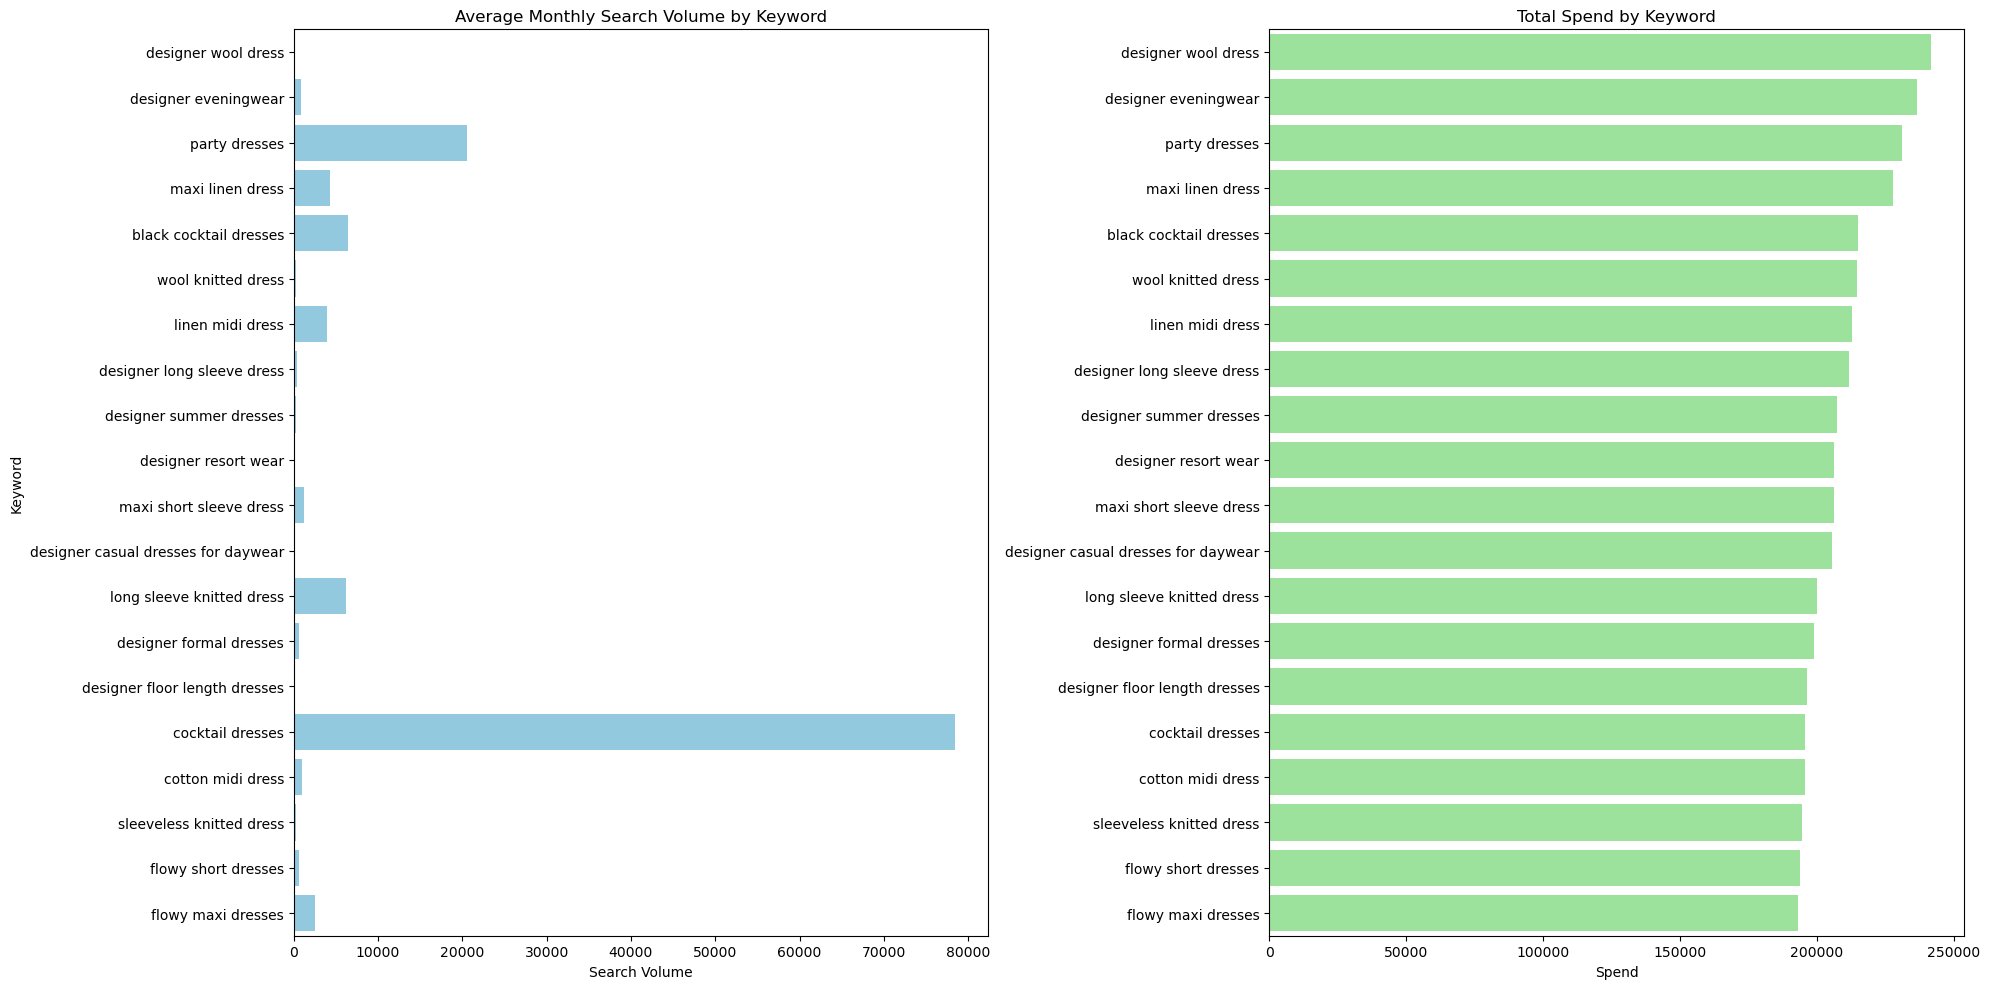

Correlation between Search Volume and Spend across keywords: 0.02


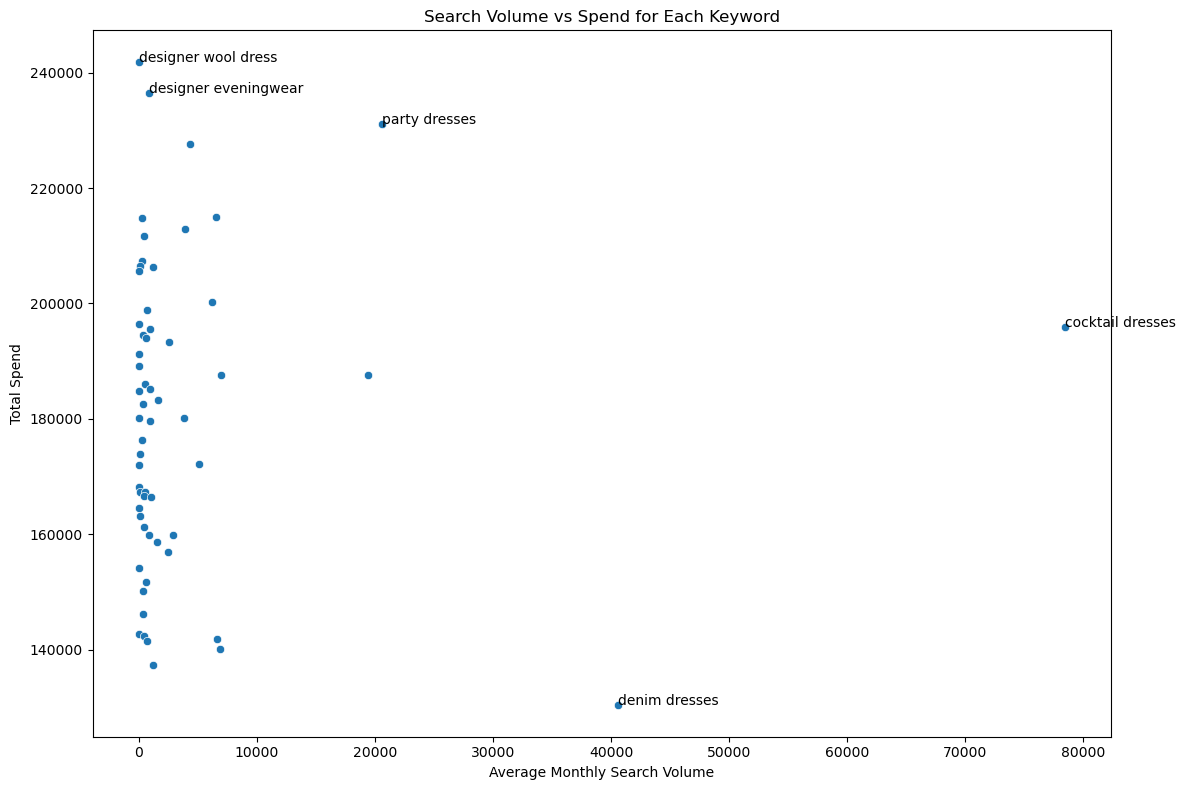

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is already created from previous steps
# If not, you'll need to merge df and df2 as done in the earlier code

# Aggregate data by keyword
keyword_data = merged_df.groupby('keyword').agg({
    'SearchVolume': 'mean',
    'Spend': 'sum'
}).reset_index()

# Sort keywords by total spend
keyword_data = keyword_data.sort_values('Spend', ascending=False)

# Select top N keywords for readability (adjust as needed)
top_n = 20
top_keywords = keyword_data.head(top_n)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot Search Volume
sns.barplot(x='SearchVolume', y='keyword', data=top_keywords, ax=ax1, color='skyblue')
ax1.set_title('Average Monthly Search Volume by Keyword')
ax1.set_xlabel('Search Volume')
ax1.set_ylabel('Keyword')

# Plot Spend
sns.barplot(x='Spend', y='keyword', data=top_keywords, ax=ax2, color='lightgreen')
ax2.set_title('Total Spend by Keyword')
ax2.set_xlabel('Spend')
ax2.set_ylabel('')  # Remove y-label as it's the same as the first plot

# Adjust layout and display
plt.tight_layout()
plt.show()

# Calculate and print correlation
correlation = keyword_data['SearchVolume'].corr(keyword_data['Spend'])
print(f"Correlation between Search Volume and Spend across keywords: {correlation:.2f}")

# Scatter plot of Search Volume vs Spend
plt.figure(figsize=(12, 8))
sns.scatterplot(x='SearchVolume', y='Spend', data=keyword_data)
plt.title('Search Volume vs Spend for Each Keyword')
plt.xlabel('Average Monthly Search Volume')
plt.ylabel('Total Spend')

# Annotate some interesting points
for i, row in keyword_data.iterrows():
    if row['Spend'] > keyword_data['Spend'].quantile(0.95) or row['SearchVolume'] > keyword_data['SearchVolume'].quantile(0.95):
        plt.annotate(row['keyword'], (row['SearchVolume'], row['Spend']))

plt.tight_layout()
plt.show()

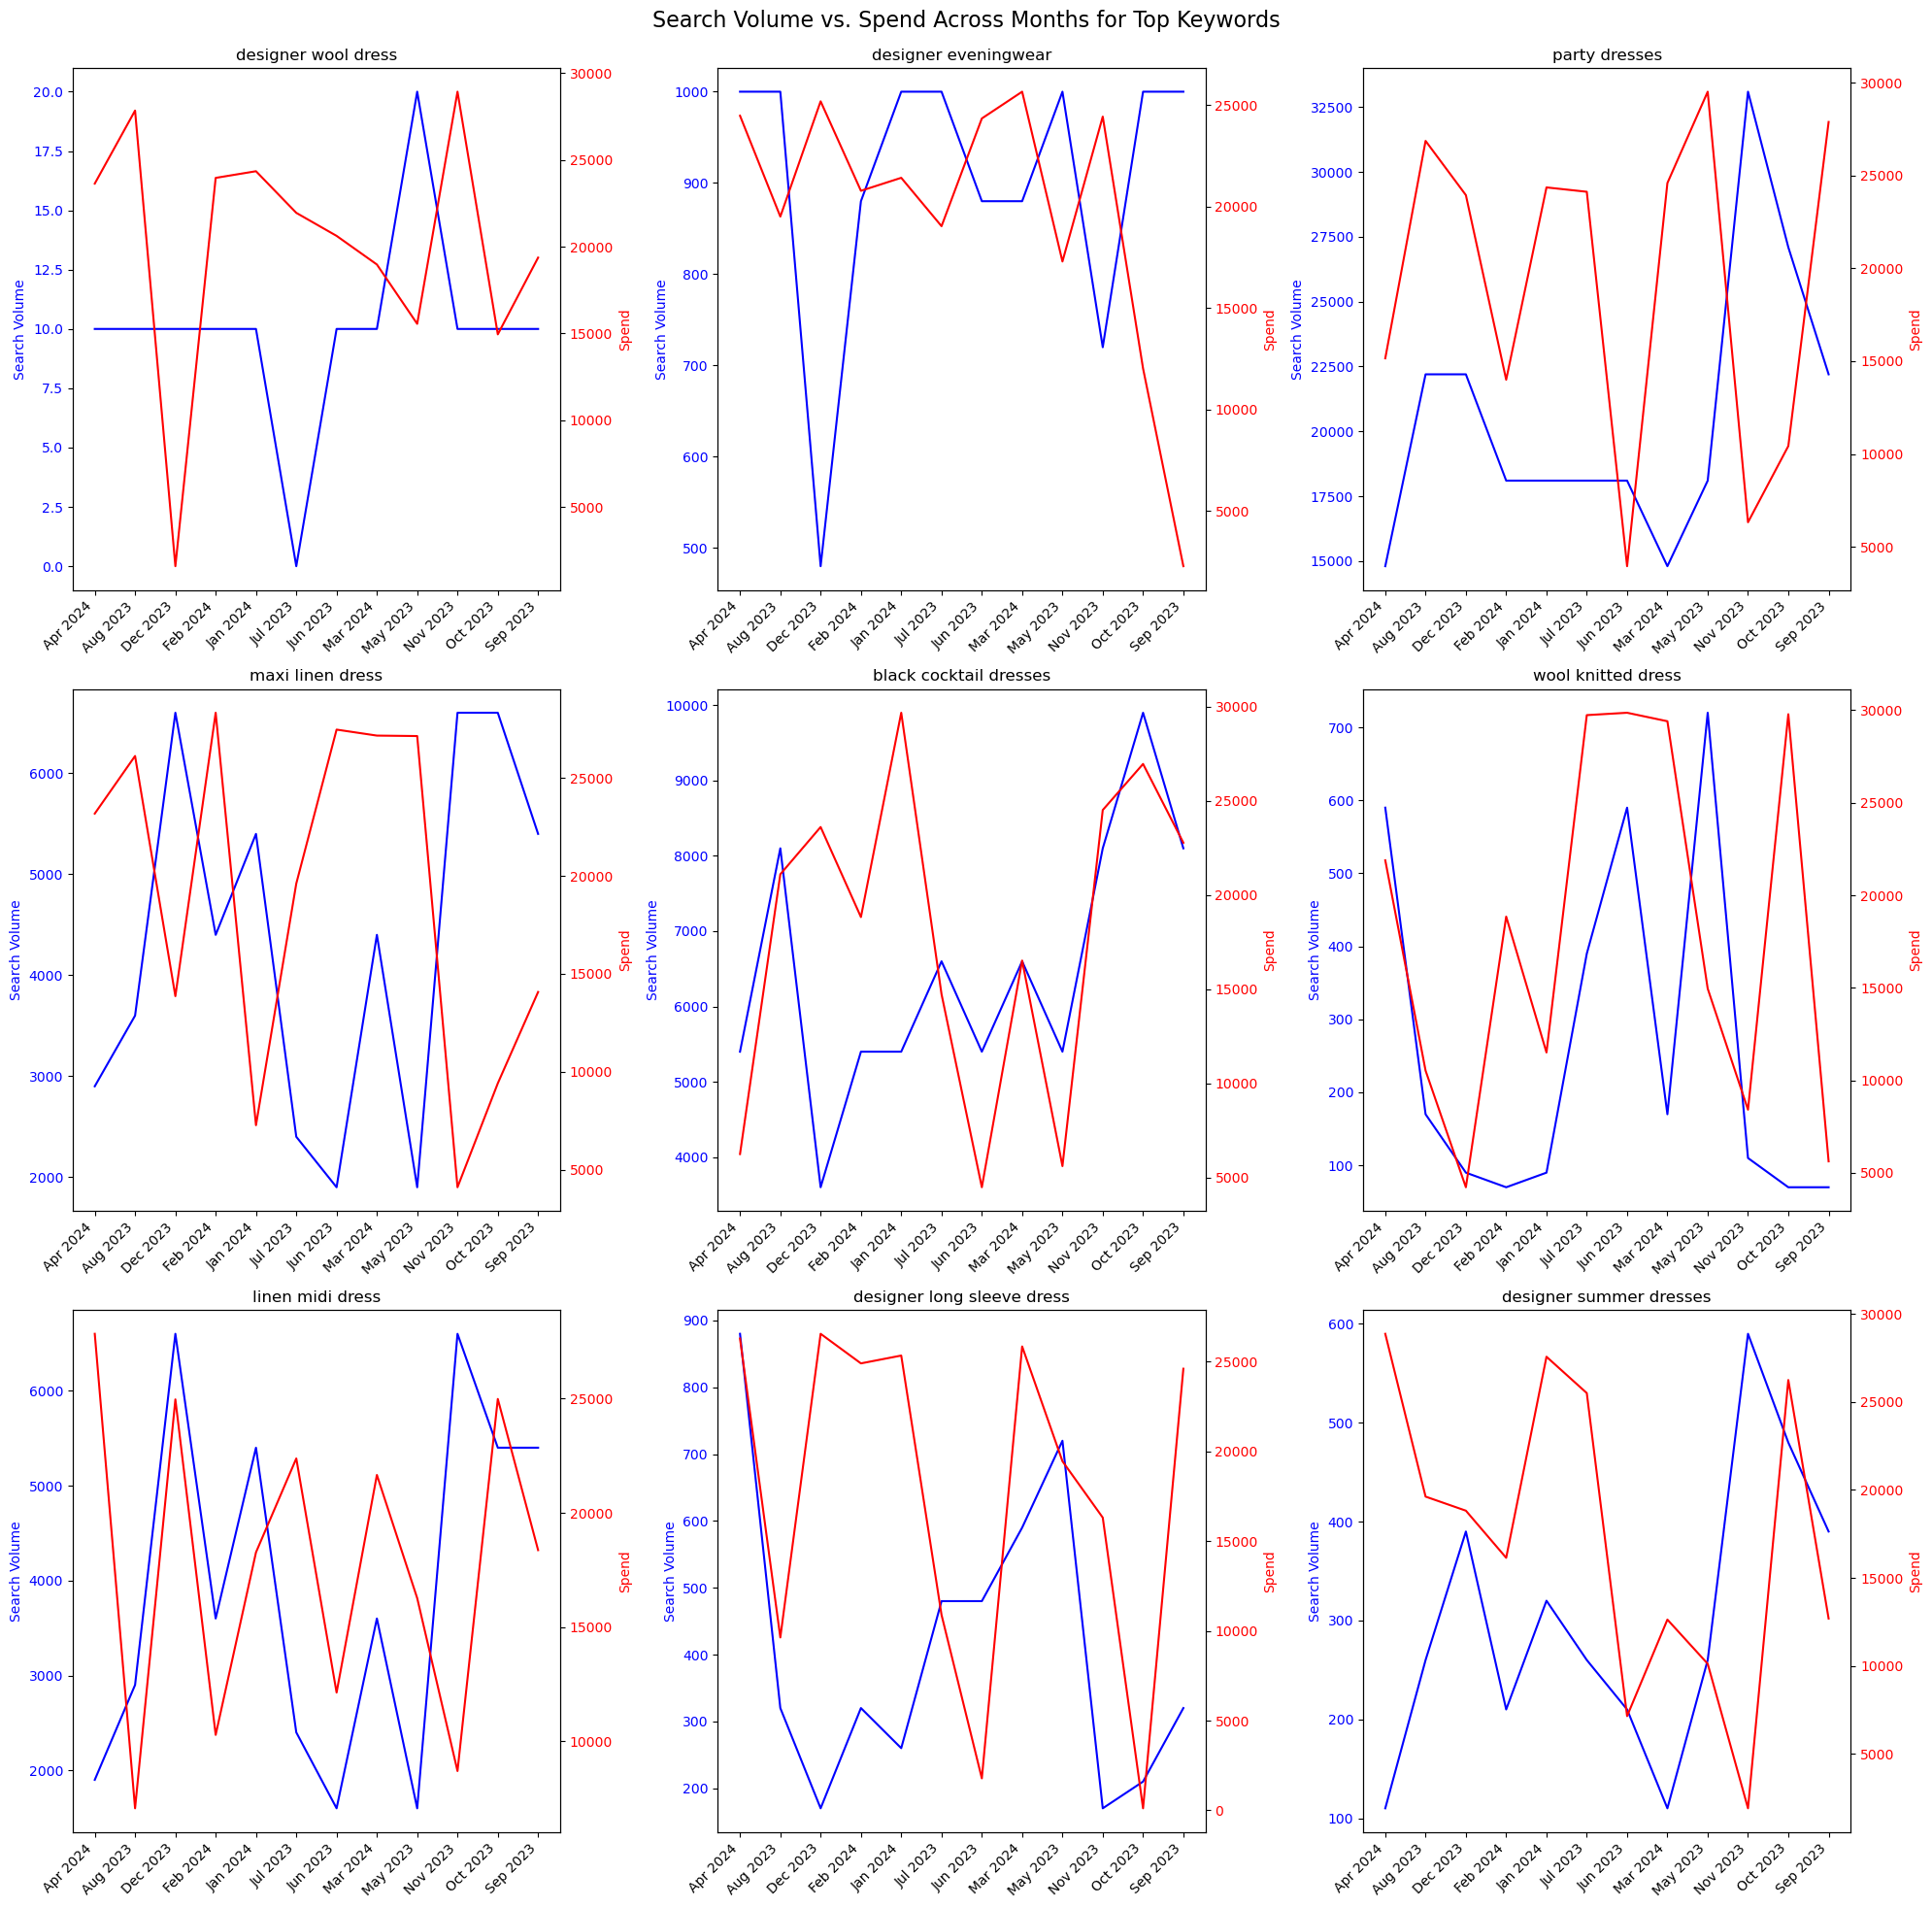

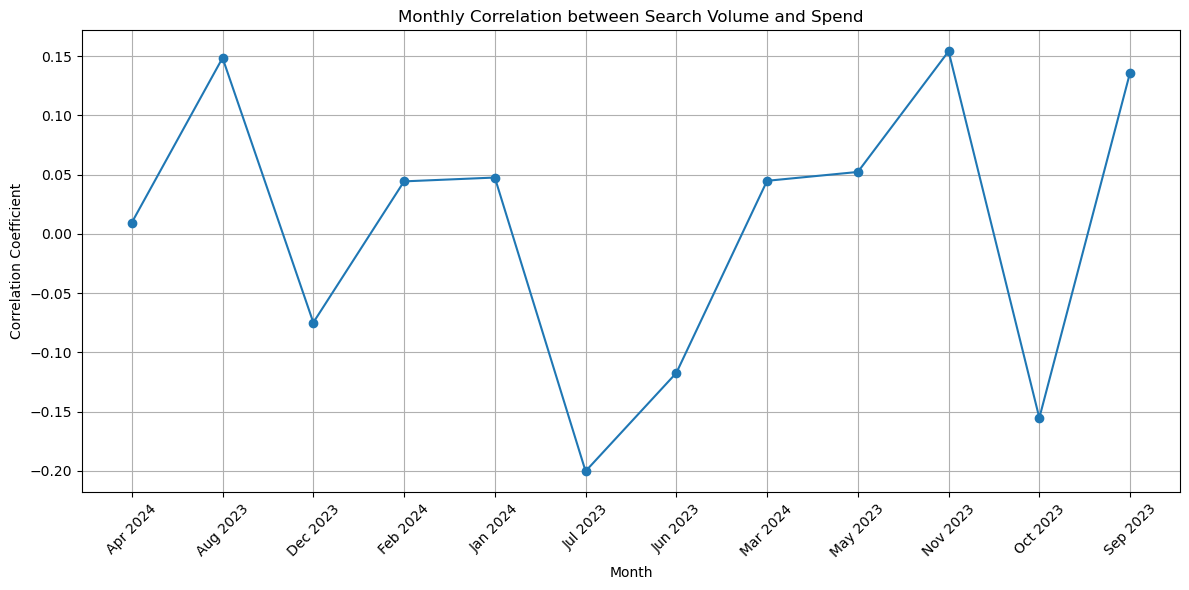

Average monthly correlation between Search Volume and Spend: 0.01


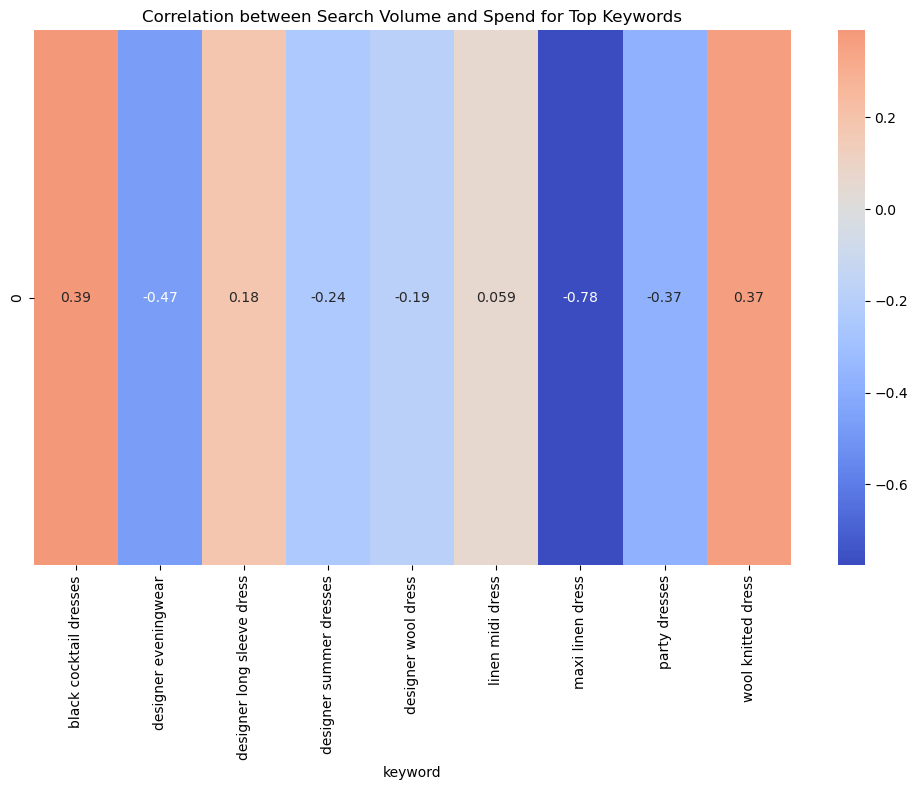

In [100]:
merged_df = merged_df.sort_values('Month')

# Function to plot for a single keyword
def plot_keyword(keyword_df, ax):
    keyword = keyword_df['keyword'].iloc[0]
    
    # Plot search volume
    ax.plot(keyword_df['Month'], keyword_df['SearchVolume'], label='Search Volume', color='blue')
    ax.set_ylabel('Search Volume', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Plot spend on secondary y-axis
    ax2 = ax.twinx()
    ax2.plot(keyword_df['Month'], keyword_df['Spend'], label='Spend', color='red')
    ax2.set_ylabel('Spend', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    ax.set_title(f'{keyword}')
    ax.set_xlabel('')
    
    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Get top N keywords by total spend
top_n = 9  # Adjust this number to show more or fewer keywords
top_keywords = merged_df.groupby('keyword')['Spend'].sum().nlargest(top_n).index

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))  # Adjust the grid size based on top_n
fig.suptitle('Search Volume vs. Spend Across Months for Top Keywords', fontsize=16)

# Plot for each top keyword
for i, keyword in enumerate(top_keywords):
    keyword_df = merged_df[merged_df['keyword'] == keyword]
    ax = axes[i // 3, i % 3]
    plot_keyword(keyword_df, ax)

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust this value to prevent title overlap
plt.show()

# Calculate and plot overall correlation trend
monthly_correlation = merged_df.groupby('Month').apply(lambda x: x['SearchVolume'].corr(x['Spend']))

plt.figure(figsize=(12, 6))
plt.plot(monthly_correlation.index, monthly_correlation.values, marker='o')
plt.title('Monthly Correlation between Search Volume and Spend')
plt.xlabel('Month')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print average correlation
print(f"Average monthly correlation between Search Volume and Spend: {monthly_correlation.mean():.2f}")

# Heatmap of correlations for top keywords
top_keyword_corr = merged_df[merged_df['keyword'].isin(top_keywords)].groupby('keyword').apply(lambda x: x['SearchVolume'].corr(x['Spend']))

plt.figure(figsize=(10, 8))
sns.heatmap(top_keyword_corr.to_frame().T, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Search Volume and Spend for Top Keywords')
plt.tight_layout()
plt.show()

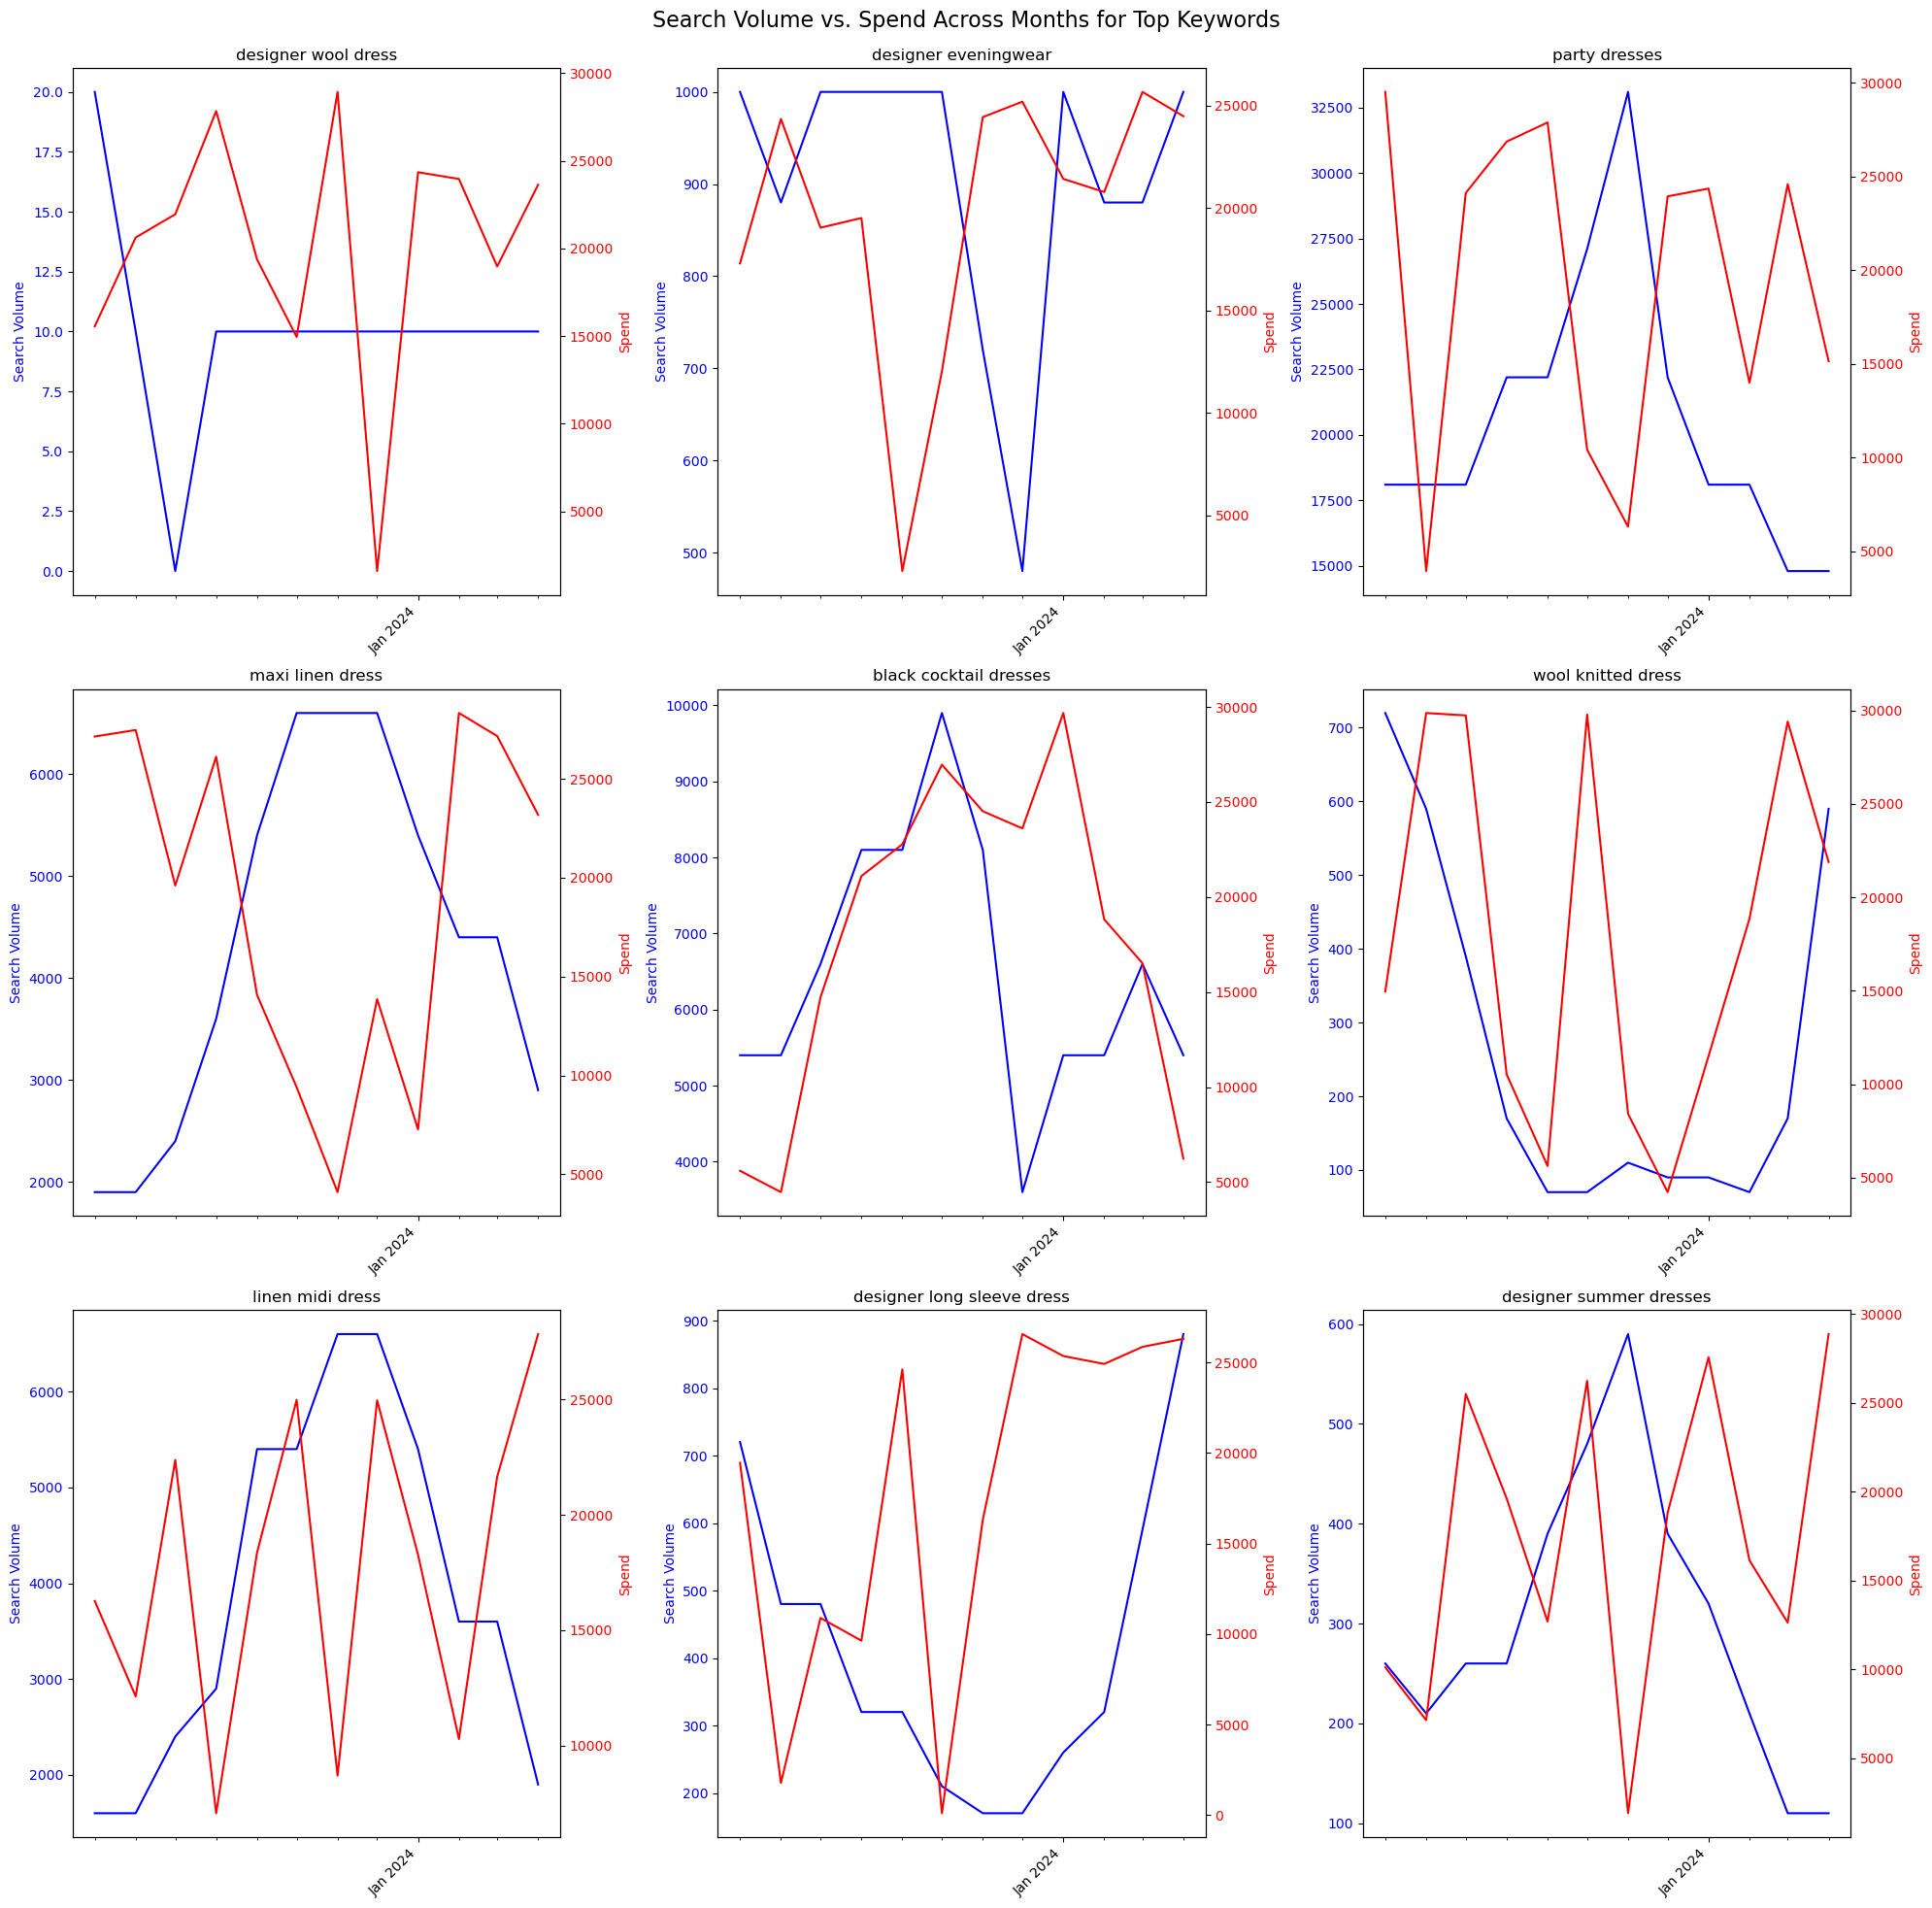

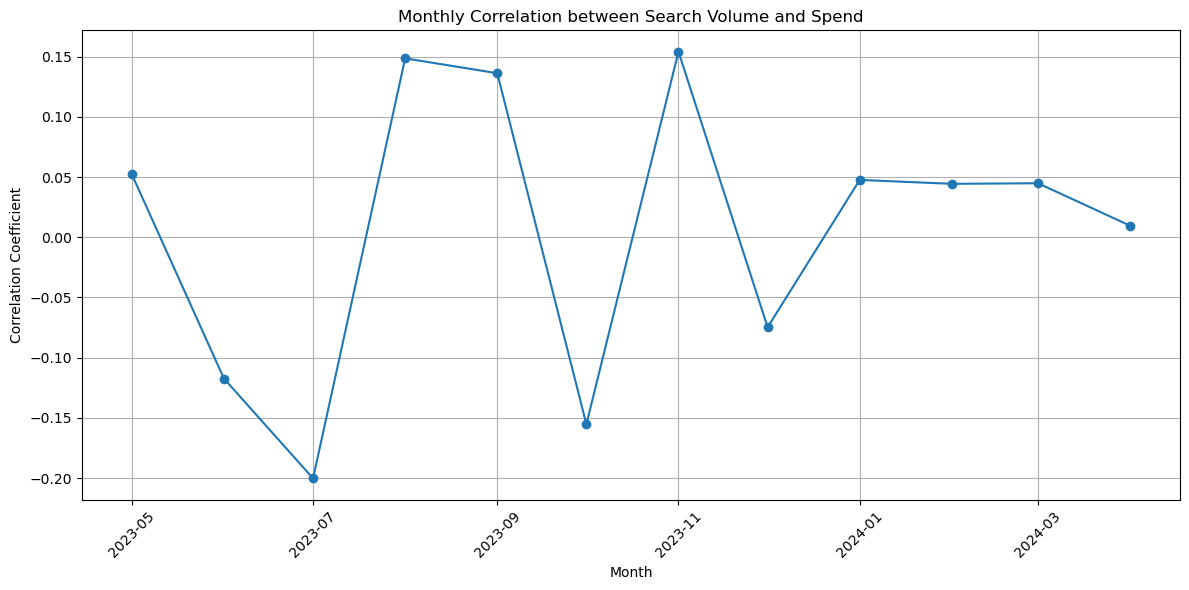

Average monthly correlation between Search Volume and Spend: 0.01


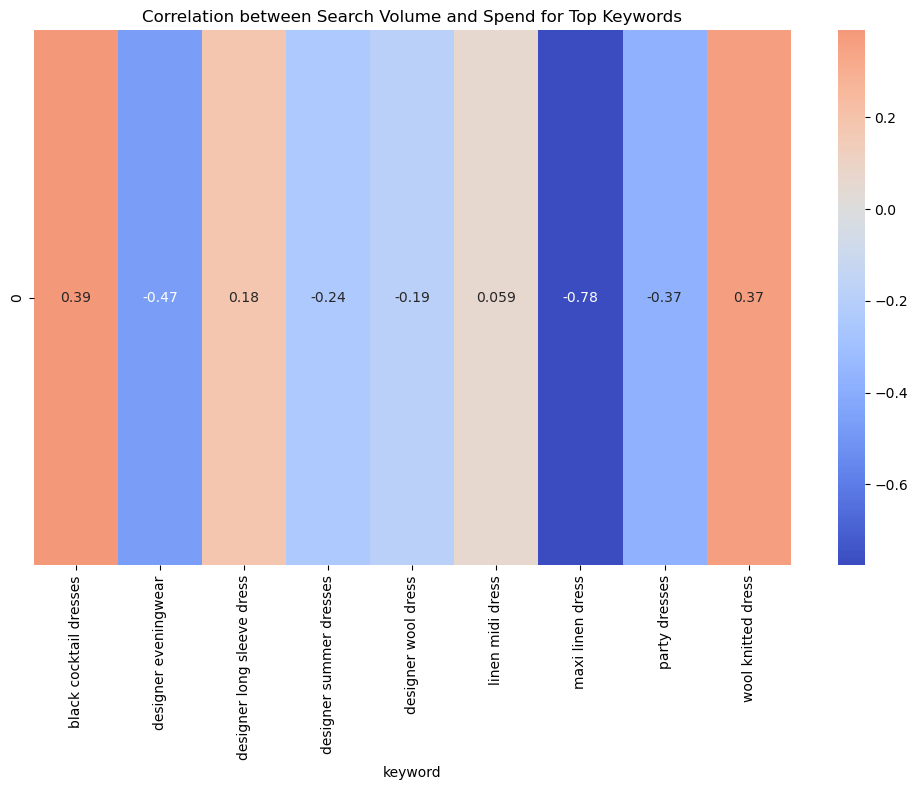

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

# Assuming merged_df is already created from previous steps
# If not, you'll need to merge df and df2 as done in the earlier code



# Sort the dataframe by Month
merged_df = merged_df.sort_values('Month')

# Function to plot for a single keyword
def plot_keyword(keyword_df, ax):
    keyword = keyword_df['keyword'].iloc[0]
    
    # Plot search volume
    ax.plot(keyword_df['Month'], keyword_df['SearchVolume'], label='Search Volume', color='blue')
    ax.set_ylabel('Search Volume', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Plot spend on secondary y-axis
    ax2 = ax.twinx()
    ax2.plot(keyword_df['Month'], keyword_df['Spend'], label='Spend', color='red')
    ax2.set_ylabel('Spend', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    ax.set_title(f'{keyword}')
    ax.set_xlabel('')
    
    # Format x-axis labels
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
    ax.xaxis.set_minor_locator(MonthLocator())
    
    # Rotate and align the tick labels so they look better
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Get top N keywords by total spend
top_n = 9  # Adjust this number to show more or fewer keywords
top_keywords = merged_df.groupby('keyword')['Spend'].sum().nlargest(top_n).index

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))  # Adjust the grid size based on top_n
fig.suptitle('Search Volume vs. Spend Across Months for Top Keywords', fontsize=16)

# Plot for each top keyword
for i, keyword in enumerate(top_keywords):
    keyword_df = merged_df[merged_df['keyword'] == keyword]
    ax = axes[i // 3, i % 3]
    plot_keyword(keyword_df, ax)

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust this value to prevent title overlap
plt.show()

# Calculate and plot overall correlation trend
monthly_correlation = merged_df.groupby('Month').apply(lambda x: x['SearchVolume'].corr(x['Spend']))

plt.figure(figsize=(12, 6))
plt.plot(monthly_correlation.index, monthly_correlation.values, marker='o')
plt.title('Monthly Correlation between Search Volume and Spend')
plt.xlabel('Month')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print average correlation
print(f"Average monthly correlation between Search Volume and Spend: {monthly_correlation.mean():.2f}")

# Heatmap of correlations for top keywords
top_keyword_corr = merged_df[merged_df['keyword'].isin(top_keywords)].groupby('keyword').apply(lambda x: x['SearchVolume'].corr(x['Spend']))

plt.figure(figsize=(10, 8))
sns.heatmap(top_keyword_corr.to_frame().T, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Search Volume and Spend for Top Keywords')
plt.tight_layout()
plt.show()